<a href="https://colab.research.google.com/github/zideric/colab/blob/main/RetiNeuraliConvoluzionali_Filtri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtri

questa parte non è necessaria perchè è Keras che si occuperà di applicare i filtri ma è utile per capire come funziona

In [6]:
from skimage import io
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [13,13]
plt.figure(figsize=(25,25))

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

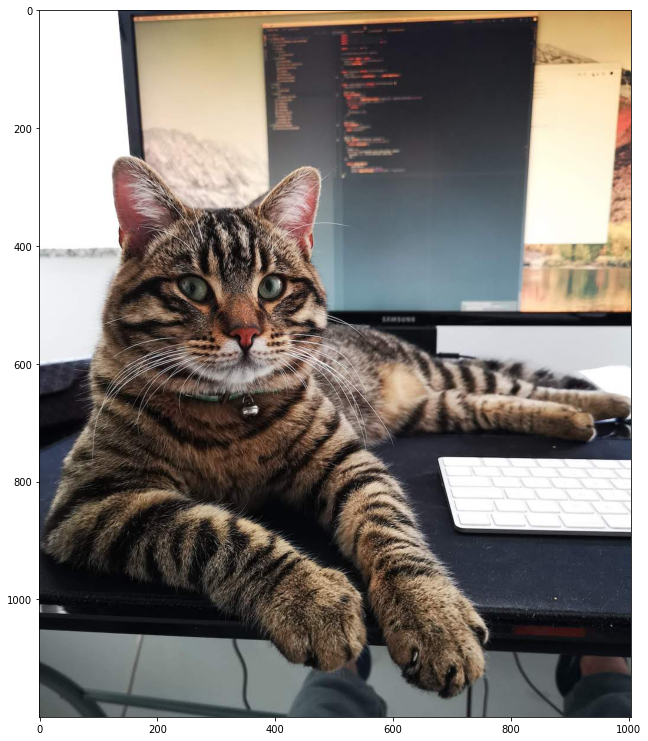

In [7]:
elon = io.imread("https://github.com/ProfAI/dl00/blob/master/8%20-%20Reti%20neurali%20convoluzionali/elon.jpg?raw=true")
plt.imshow(elon, cmap="gray")

## Applicare filtri a immagini in bianco e nero con Scipy

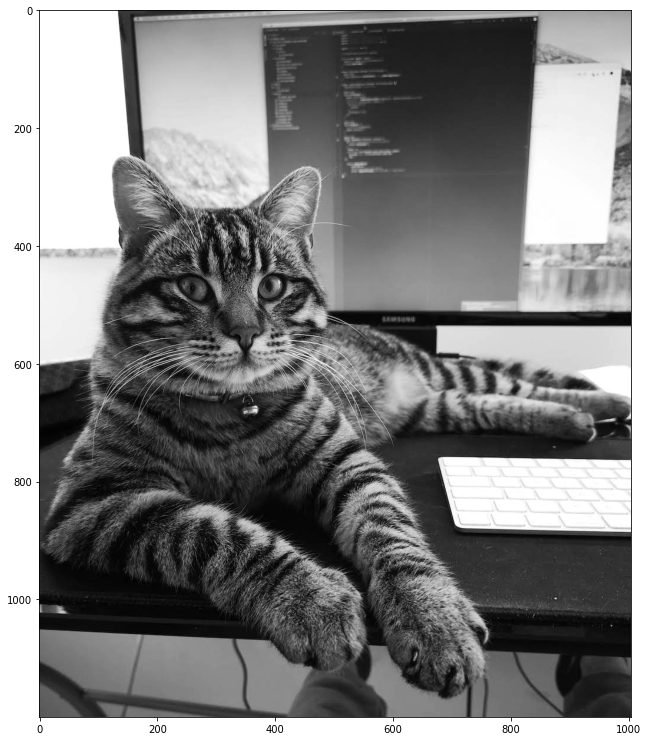

In [8]:

elon_bw = rgb2gray(elon)
plt.imshow(elon_bw, cmap="gray")

## Diversi tipi di fiiltri

creo gli array che rappresentano i filtri che applicheremo

a differenza dell'esercizio ho creato una funzione


In [10]:
from scipy.signal import convolve2d as conv2d 
import numpy as np

def img_filterd(filter_type):
    vline_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    hline_filter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    edge_filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    if filter_type == 'vertical':
      filter_choice = vline_filter
      filter_title = 'Filtro linee verticali'
      filter_divide = 9. #nell'esempio per verticale e orizzontale divideva per 9
    elif filter_type == 'horizontal':
      filter_choice = hline_filter
      filter_title = 'Filtro linee orizzontali'
      filter_divide = 9. #nell'esempio per verticale e orizzontale divideva per 9
    else:
      filter_choice = edge_filter
      filter_title = 'Filtro angoli (Edge detector)'
      filter_divide = 1. #nell'esempio non divideva
  
    elon_filter = conv2d(elon_bw, filter_choice)/filter_divide

    print(filter_title)
    print(filter_choice)

    plt.imshow(elon_filter, cmap="gray")
    plt.axis('off')
    #plt.savefig('elon '+filter_type+'jpg')
        

## Vertical lines detection

Filtro linee verticali
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


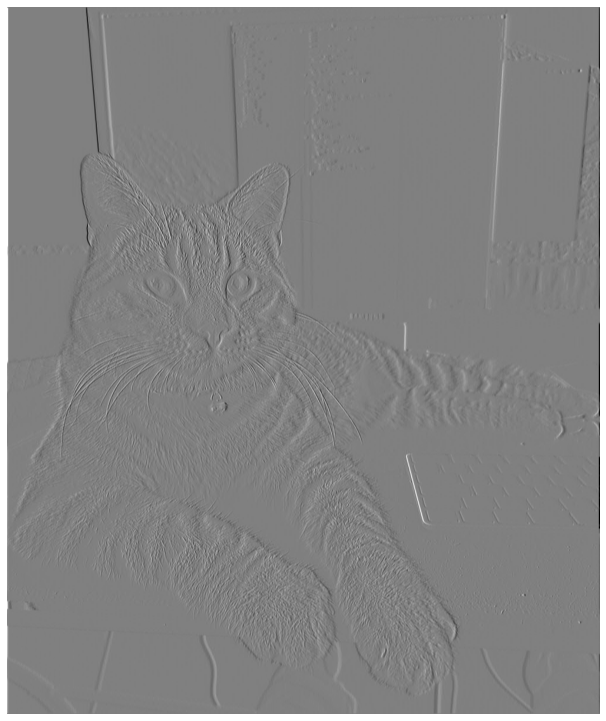

In [11]:
img_filterd('vertical')

## Horizontal lines detection

Filtro linee orizzontali
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


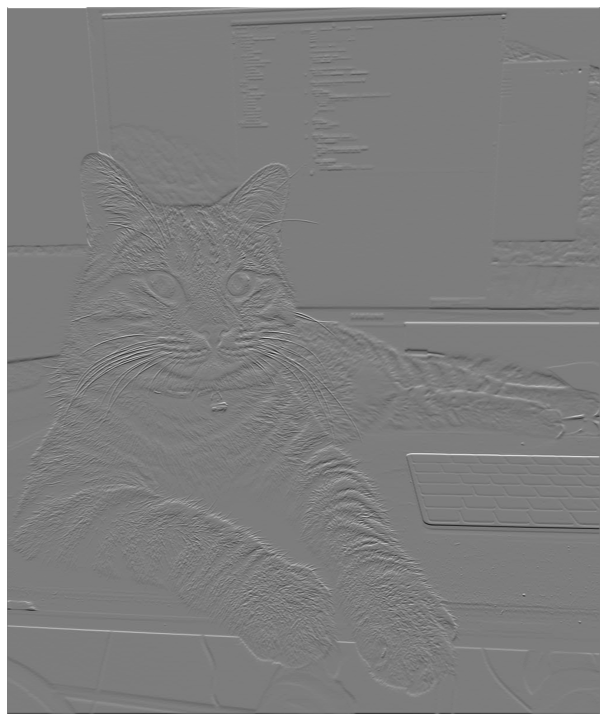

In [12]:
img_filterd('horizontal')

## Edge detection


Filtro angoli (Edge detector)
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


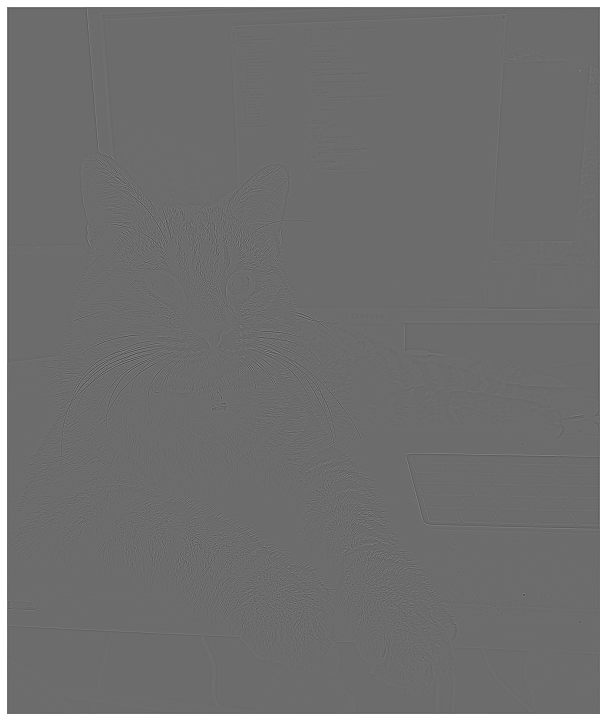

In [13]:
img_filterd('edge')

## Applicare filtri a immagini a colori con OpenCV

Edge detection

In [14]:
import cv2

def img_cv2_filterd(filter_type):
    
    emboss_filter = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
    blur_filter = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.
    sharp_filter = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    edge_filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])

    if filter_type == 'emboss':
      filter_choice = emboss_filter
      filter_title = 'Filtro rilievo (emboss)'

    elif filter_type == 'blur':
      filter_choice = blur_filter
      filter_title = 'Filtro sfocatura (blur)'

    elif filter_type == 'sharp':
      filter_choice = sharp_filter
      filter_title = 'Filtro nitidezza (sharp)'

    else:
      filter_choice = edge_filter
      filter_title = 'Filtro angoli (Edge detector)'

  
    elon_filter = cv2.filter2D(elon, -1, filter_choice)

    print(filter_title)
    print(filter_choice)

    plt.imshow(elon_filter, cmap="gray")
    plt.axis('off')
    #plt.savefig('elon '+filter_type+'jpg')

### Edge Detection

Filtro angoli (Edge detector)
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


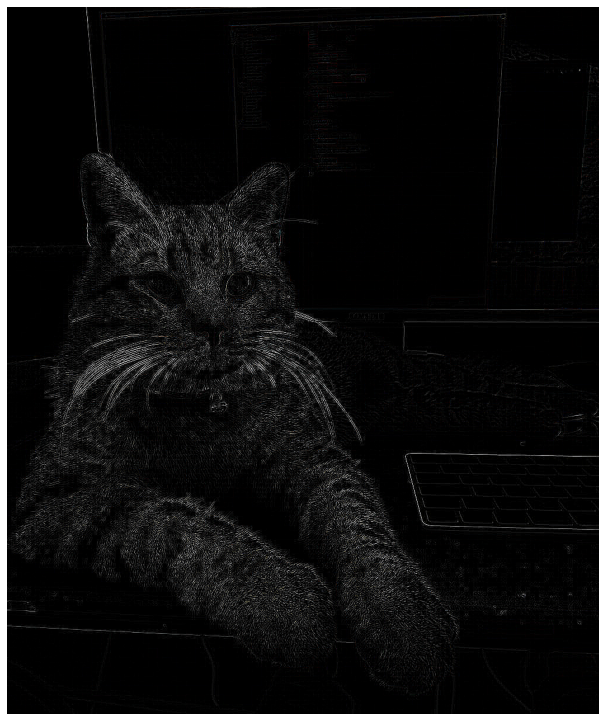

In [15]:
img_cv2_filterd('edge')


### Effetto rilievo



Filtro rilievo (emboss)
[[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]]


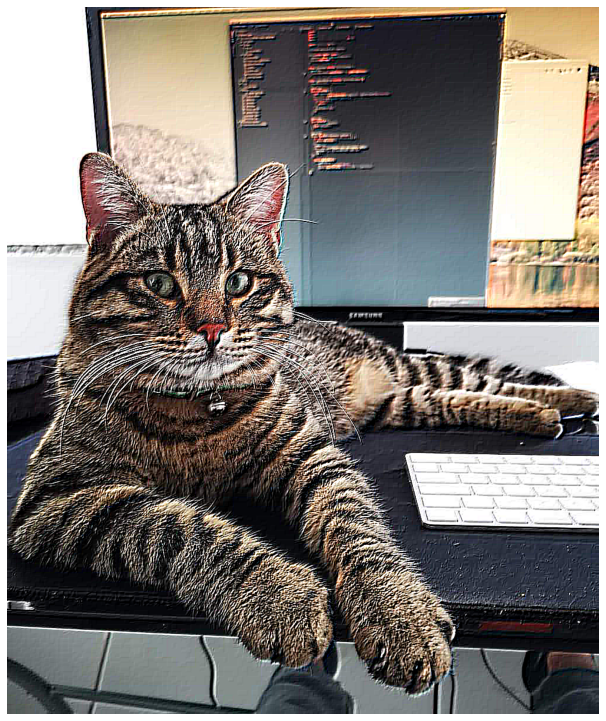

In [16]:
img_cv2_filterd('emboss')

### Effetto sfocatura

Filtro sfocatura (blur)
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


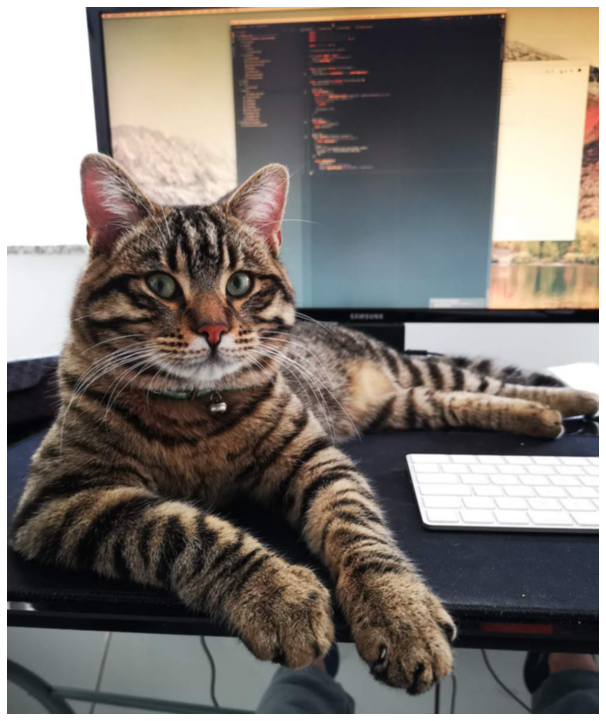

In [17]:
img_cv2_filterd('blur')

### Effetto nitidezza

Filtro nitidezza (sharp)
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


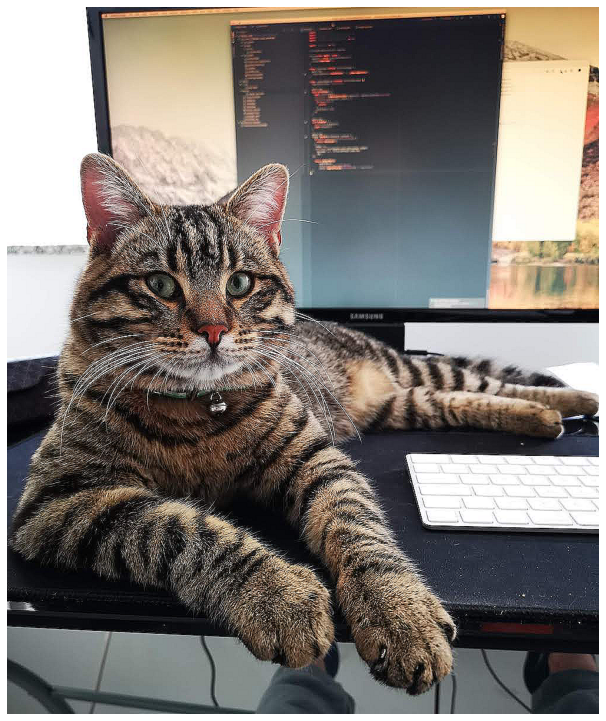

In [18]:
img_cv2_filterd('sharp')